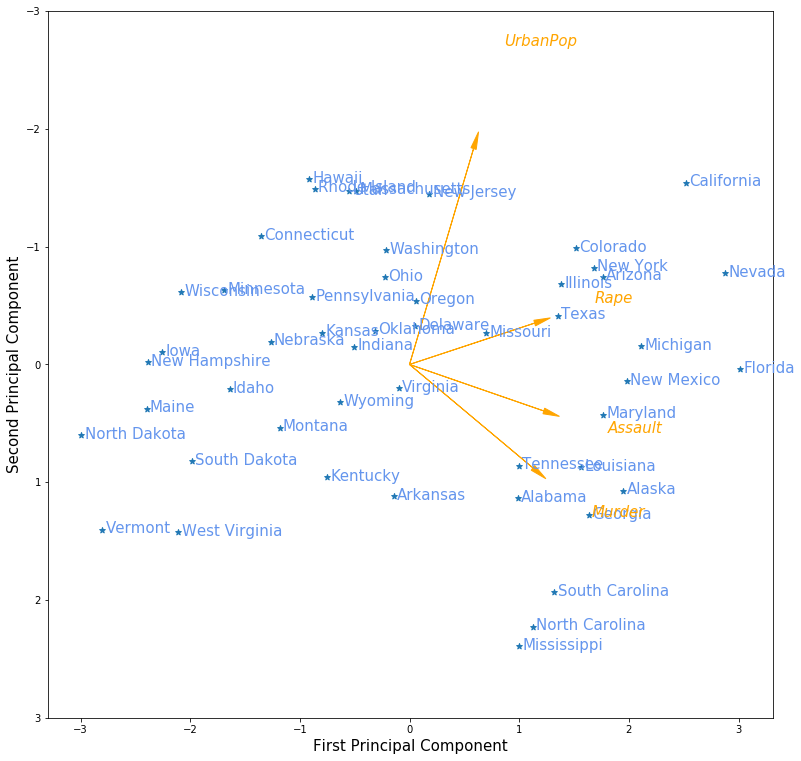

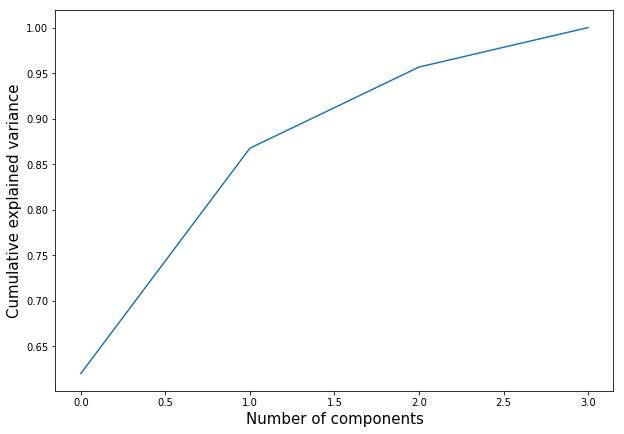

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import sklearn.preprocessing

data = pd.read_csv('Datos/USArrests.csv')
#print(data.keys())
columns = ['Murder', 'Assault', 'UrbanPop', 'Rape']
X = np.array(data[columns])
names = data['City']

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X_scaled)

vec = np.transpose(pca.components_[0:2,:])

crimes = ['Murder', 'Assault', 'UrbanPop', 'Rape']

plt.figure(figsize = (13,13))
plt.scatter(X_pca[:,0],X_pca[:,1], marker='*')
for x, y, text in zip(X_pca[:,0], X_pca[:,1], names):
    plt.text(x + 0.03, y + 0.03, text, color = 'cornflowerblue',fontsize = 15)
for i in range(np.transpose(pca.components_[0:2,:]).shape[0]):
    plt.arrow(0, 0, vec[i,0] * 2.1, vec[i,1] * 2.1, color = 'orange',head_width=0.05, head_length=0.15)
    plt.text(vec[i,0] * 3.1, vec[i,1] * 3.1, crimes[i], fontsize=15, color='orange', style = 'italic')
plt.xlabel('First Principal Component',fontsize = 15)
plt.ylabel('Second Principal Component',fontsize = 15)
plt.ylim(3, -3)
plt.show()
#print(vec)

plt.figure(figsize = (10, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components', fontsize = 15)
plt.ylabel('Cumulative explained variance', fontsize = 15)
plt.show()

In [81]:
pca.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])